First lets access the data

Transaction logs were retrieved from the public AWS S3 bucket  `postie-testing-assets` (us-east-1). Files are partitioned by date.



In [3]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#load files
url1 = "https://postie-testing-assets.s3.amazonaws.com/2017-07-01.csv"
url2 = "https://postie-testing-assets.s3.amazonaws.com/2017-07-02.csv"
url3 = "https://postie-testing-assets.s3.amazonaws.com/2017-07-03.csv"

df1 = pd.read_csv(url1)
df2 = pd.read_csv(url2)
df3 = pd.read_csv(url3)


Lets take a look at each one


In [12]:
#July 1st
df1.describe()

,website_id,customer_id,app_version,placeholder,checkout_amount
count,11634.000000,11634.000000,1.163400e+04,0.0,11634.000000
mean,123.504813,5802.915936,1.100000e+00,NaN,20.757349
std,0.499998,3362.814717,2.267173e-13,NaN,730.086625
min,123.000000,2.000000,1.100000e+00,NaN,0.000000
25%,123.000000,2887.250000,1.100000e+00,NaN,5.000000
50%,124.000000,5797.000000,1.100000e+00,NaN,6.000000
75%,124.000000,8711.750000,1.100000e+00,NaN,7.000000
max,124.000000,11613.000000,1.100000e+00,NaN,55084.000000


In [11]:
#July 2nd
df2.describe()

,website_id,customer_id,app_version,placeholder,checkout_amount
count,11573.000000,11573.000000,1.157300e+04,0.0,11573.000000
mean,123.496241,5795.790029,1.100000e+00,NaN,15.838071
std,0.500007,3358.634162,2.260512e-13,NaN,522.950661
min,123.000000,1.000000,1.100000e+00,NaN,3.000000
25%,123.000000,2850.000000,1.100000e+00,NaN,5.000000
50%,123.000000,5804.000000,1.100000e+00,NaN,6.000000
75%,124.000000,8705.000000,1.100000e+00,NaN,7.000000
max,124.000000,11613.000000,1.100000e+00,NaN,55002.000000


In [10]:
#July 3rd
df3.describe()

,website_id,customer_id,app_version,checkout_amount
count,9981.000000,9981.000000,9981.000000,9981.000000
mean,123.502455,5816.531009,1.182046,16.437732
std,0.500019,3338.858408,0.038382,606.596512
min,123.000000,5.000000,1.100000,-12.000000
25%,123.000000,2948.000000,1.200000,5.000000
50%,124.000000,5792.000000,1.200000,6.000000
75%,124.000000,8711.000000,1.200000,7.000000
max,124.000000,11612.000000,1.200000,60000.000000


## [Question 1 start] The analyst wants you to figure out why their 2017-07-03 sales value is much lower than their previous day sales summary.

Some observations July 3rd has much at least 1,500 less datapoints than the previous two days and also it has 12 negative values of 12 making 144 dollars less for checkout amount.

Next we do some data cleaning making sure the date time lines up and checkout amounts are good

In [31]:
df1['timestamp'] = pd.to_datetime(df1['timestamp'], utc=True)
df2['timestamp'] = pd.to_datetime(df2['timestamp'], utc=True)
df3['timestamp'] = pd.to_datetime(df3['timestamp'], utc=True)
#for checkout amount there is a space before in the csv, which is not neccesary
df1[' checkout_amount'] = pd.to_numeric(df1[' checkout_amount'], errors='coerce')
df2[' checkout_amount'] = pd.to_numeric(df2[' checkout_amount'], errors='coerce')
df3[' checkout_amount'] = pd.to_numeric(df3[' checkout_amount'], errors='coerce')

Now we check for missing data

In [26]:
df1.isnull().sum()

,0
timestamp,0
website_id,0
customer_id,0
app_version,0
placeholder,11634
checkout_amount,0
url,0


In [27]:
df2.isnull().sum()

,0
timestamp,0
website_id,0
customer_id,0
app_version,0
placeholder,11573
checkout_amount,0
url,0


In [28]:
df3.isnull().sum()

,0
timestamp,0
website_id,0
customer_id,0
app_version,0
placeholder,1792
checkout_amount,0
url,0


Here we see only July 3rd contains "new_version" in the placeholder file. This tpyically is a placeholder or indicator for updating data

Next we convert the timestamp and look at the total amount of money spent

In [36]:
daily_sales1 = df1.groupby(df1['timestamp'].dt.date)[' checkout_amount'].sum()
daily_sales1

,checkout_amount
timestamp,
2017-07-01,223515.0
2017-07-02,17976.0


In [33]:
daily_sales2 = df2.groupby(df2['timestamp'].dt.date)[' checkout_amount'].sum()
daily_sales2


,checkout_amount
timestamp,
2017-07-02,165776.0
2017-07-03,17518.0


In [34]:
daily_sales3 = df3.groupby(df3['timestamp'].dt.date)[' checkout_amount'].sum()
daily_sales3

,checkout_amount
timestamp,
2017-07-03,164065.0


We see that for the 1st and 2nd there are date times that correspond to the next day, a lack of this in the 3rd can also suggest there is missing data

## [Question 1] The July 3rd sales are lower because of fewer transactions (~1500 less) which could be due to missing data or a truncation of the data. Evidence for this is observed throughout this file, when looking at website version we see a shift on the 3rd from one website to another, was the previos website down? Also there is a new version only on the 3rd day in the placeholder column.

## [Question 2 start] The new analyst would also like a report detailing other key metrics for the system. Other than the average sales value per day, are there any other metrics that they should be using? Is an average sales value the right metric to use? Explain why/why not.

In [51]:
#lets look at the mean spent in a day
df1.groupby(df1['timestamp'].dt.date)[' checkout_amount'].mean()

,checkout_amount
timestamp,
2017-07-01,22.570433
2017-07-02,10.384749


In [42]:
df2.groupby(df2['timestamp'].dt.date)[' checkout_amount'].mean()

,checkout_amount
timestamp,
2017-07-02,16.905568
2017-07-03,9.913978


In [43]:
df3.groupby(df3['timestamp'].dt.date)[' checkout_amount'].mean()

,checkout_amount
timestamp,
2017-07-03,16.437732


Here we see day 1 has a mean of 223515, 2 = 17976 + 165776, 3 = 17518 + 164065. This shows little difference between day 2 and 3 which can be misleading if there are large outlier

Lets look at the number of unique customers



In [56]:
df1.groupby(df1['timestamp'].dt.date)[' customer_id'].nunique()

,customer_id
timestamp,
2017-07-01,7372
2017-07-02,1654


In [57]:
df2.groupby(df2['timestamp'].dt.date)[' customer_id'].nunique()

,customer_id
timestamp,
2017-07-02,7351
2017-07-03,1672


In [58]:
df3.groupby(df3['timestamp'].dt.date)[' customer_id'].nunique()

,customer_id
timestamp,
2017-07-03,7412


Unique customers stayed pretty similar across days

Next lets compare the spending habits by website

In [44]:
df1.groupby(' website_id')[' checkout_amount'].sum()

,checkout_amount
website_id,
123,182100.0
124,59391.0


In [45]:
df2.groupby(' website_id')[' checkout_amount'].sum()

,checkout_amount
website_id,
123,127466.0
124,55828.0


In [46]:
df3.groupby(' website_id')[' checkout_amount'].sum()

,checkout_amount
website_id,
123,55693.0
124,108372.0


Here we see the 3rd day has opposite spending habits by website having 124 with the most instead of 123 like the others

Now we look at amount spent per app version

In [47]:
df1.groupby(' app_version')[' checkout_amount'].sum()

,checkout_amount
app_version,
1.1,241491.0


In [48]:
df2.groupby(' app_version')[' checkout_amount'].sum()

,checkout_amount
app_version,
1.1,183294.0


In [49]:
df3.groupby(' app_version')[' checkout_amount'].sum()

,checkout_amount
app_version,
1.1,25917.0
1.2,138148.0


Interestinly enough we see that only the 3rd day has more than one app and from this we also see the totals spent 1 = 241491 // 2  = 183294 // 3 = 25917 + 138148. This change in app version could be the reason of the truncated data and the new_version placeholder

## [Question 2] Averages typcially hide volume effects of revenue, are sensitive to outliers, and it hides segmentation or differences across website and app version. You should instead look at total daily revenue, transaction count, unique customers, and revenue by website or app version

## [Question 3 start] What information can you extract from the urls? Can you infer allb product prices? Is there any other information that you believe would be useful to understand what is going on?

In [59]:
from urllib.parse import urlparse, parse_qs

# Here we define how to extract the products
def extract_products(url):
    parsed = urlparse(url)
    params = parse_qs(parsed.query)
    return params

# lets take a look at the different products
df1['products'] = df1[' url'].apply(extract_products)
df1[[' url','products']].head()

,url,products
0,http://xyz.com/checkout?Bignay=1,{'Bignay': ['1']}
1,http://xyz.com/checkout?Ume=1,{'Ume': ['1']}
2,http://xyz.com/checkout?Natal+Orange=1,{'Natal Orange': ['1']}
3,http://www.example.com/store/?Natal+Orange=1,{'Natal Orange': ['1']}
4,http://xyz.com/checkout?Hazelnut=1,{'Hazelnut': ['1']}


Now we define a function to group the products by their checkout count, sum and mean.

In [62]:
df1['basket'] = df1['products'].apply(lambda x: tuple(sorted(x)))
basket_summary1 = (
    df1.groupby('basket')
      .agg(
          transaction_count=(' checkout_amount', 'count'),
          total_revenue=(' checkout_amount', 'sum'),
          avg_order_value=(' checkout_amount', 'mean')
      )
      .sort_values('transaction_count', ascending=False)
)

# Lets look at the summary of the top 10 by count.
basket_summary1.head(10)

,transaction_count,total_revenue,avg_order_value
basket,,,
"(Mabolo,)",1051,8472.0,8.060894
"(Bignay,)",1023,6186.0,6.046921
"(Ume,)",1022,6198.0,6.064579
"(Hazelnut,)",1020,4120.0,4.039216
"(Black/White Pepper,)",1017,5135.0,5.049164
"(Ylang-ylang,)",1016,5140.0,5.059055
"(European Grape,)",1006,5110.0,5.079523
"(Natal Orange,)",1001,6072.0,6.065934
"(Prairie Potato,)",990,3018.0,3.048485


In [63]:
df2['products'] = df2[' url'].apply(extract_products)
df2[[' url','products']].head()
df2['basket'] = df2['products'].apply(lambda x: tuple(sorted(x)))

basket_summary2 = (
    df2.groupby('basket')
      .agg(
          transaction_count=(' checkout_amount', 'count'),
          total_revenue=(' checkout_amount', 'sum'),
          avg_order_value=(' checkout_amount', 'mean')
      )
      .sort_values('transaction_count', ascending=False)
)

basket_summary2.head(10)

,transaction_count,total_revenue,avg_order_value
basket,,,
"(Natal Orange,)",1062,6426.0,6.050847
"(Round Kumquat,)",1036,7322.0,7.067568
"(Ylang-ylang,)",1034,5225.0,5.053191
"(Black/White Pepper,)",1030,5195.0,5.043689
"(European Grape,)",1013,5130.0,5.064166
"(Prairie Potato,)",1007,3060.0,3.038729
"(Bignay,)",1002,6066.0,6.053892
"(Mabolo,)",978,7896.0,8.073620
"(Hazelnut,)",965,3904.0,4.045596


In [64]:
df3['products'] = df3[' url'].apply(extract_products)
df3[[' url','products']].head()
df3['basket'] = df3['products'].apply(lambda x: tuple(sorted(x)))

basket_summary3 = (
    df3.groupby('basket')
      .agg(
          transaction_count=(' checkout_amount', 'count'),
          total_revenue=(' checkout_amount', 'sum'),
          avg_order_value=(' checkout_amount', 'mean')
      )
      .sort_values('transaction_count', ascending=False)
)

basket_summary3.head(10)

,transaction_count,total_revenue,avg_order_value
basket,,,
"(Round Kumquat,)",934,6580.0,7.044968
"(Natal Orange,)",907,5454.0,6.013230
"(Black/White Pepper,)",895,4555.0,5.089385
"(Bignay,)",879,5274.0,6.000000
"(Prairie Potato,)",866,2625.0,3.031178
"(Ylang-ylang,)",862,4335.0,5.029002
"(Mabolo,)",861,6976.0,8.102207
"(European Grape,)",832,4195.0,5.042067
"(Hazelnut,)",830,3352.0,4.038554


## [Question 3] The urls provide a plethora of data, we can look into product identity, what is bought most and the total revenue of those purchases. It also can be then used to study product combinations or what is bought together as well as if different items are bought in different websites or versions.
## We can infer the average price of each item assuming the prices are static and there are no promotions or sales. Other useful metrics here would be traffic data, here we see only the completed transactions. Promotion data as well as geographical or device data could also provide impactfull insights

## [Question 4 start] Are there any interesting purchasing combinations, events, or metrics that are worth reporting and displaying? What information should the analyst know about the system that you’ve uncovered?

Lets look at item combinations first

In [66]:
for product_list in df1['products']:
    for combo in combinations(sorted(set(product_list)), 2):
        pairs.append(combo)

pair_df1 = pd.DataFrame(pairs, columns=['prod1', 'prod2'])

pair_counts = pair_df1.value_counts().reset_index(name='count')

pair_counts.head(10)

,prod1,prod2,count
0,Black/White Pepper,Prairie Potato,716
1,Hazelnut,Natal Orange,714
2,Black/White Pepper,Natal Orange,714
3,Natal Orange,Prairie Potato,712
4,Hazelnut,Prairie Potato,708
5,Natal Orange,Ume,708
6,European Grape,Natal Orange,696
7,Natal Orange,Round Kumquat,694
8,Prairie Potato,Round Kumquat,688
9,Natal Orange,Ylang-ylang,686


In [67]:
# Now for the 2nd day
for product_list in df2['products']:
    for combo in combinations(sorted(set(product_list)), 2):
        pairs.append(combo)

pair_df2 = pd.DataFrame(pairs, columns=['prod1', 'prod2'])

pair_counts = pair_df2.value_counts().reset_index(name='count')

pair_counts.head(10)


,prod1,prod2,count
0,Natal Orange,Ume,1049
1,European Grape,Natal Orange,1045
2,Black/White Pepper,Natal Orange,1045
3,Black/White Pepper,Prairie Potato,1032
4,Hazelnut,Natal Orange,1032
5,Natal Orange,Prairie Potato,1029
6,Natal Orange,Ylang-ylang,1021
7,Natal Orange,Round Kumquat,1018
8,Hazelnut,Prairie Potato,1016
9,European Grape,Prairie Potato,1015


In [68]:
# And for the 3rd day of July
for product_list in df3['products']:
    for combo in combinations(sorted(set(product_list)), 2):
        pairs.append(combo)

pair_df3 = pd.DataFrame(pairs, columns=['prod1', 'prod2'])

pair_counts = pair_df3.value_counts().reset_index(name='count')

pair_counts.head(10)

,prod1,prod2,count
0,Black/White Pepper,Natal Orange,1326
1,Natal Orange,Ume,1318
2,Black/White Pepper,Prairie Potato,1314
3,European Grape,Natal Orange,1311
4,Natal Orange,Prairie Potato,1307
5,Natal Orange,Round Kumquat,1302
6,Hazelnut,Natal Orange,1295
7,Prairie Potato,Round Kumquat,1291
8,European Grape,Prairie Potato,1287
9,Hazelnut,Prairie Potato,1287


Lets look at spending by time

In [72]:
df1[df1['timestamp'].dt.date == pd.to_datetime("2017-07-01").date()]\
    .groupby(df1['timestamp'].dt.hour)[' checkout_amount'].sum()

,checkout_amount
timestamp,
0,2258.0
1,2072.0
2,1844.0
3,2609.0
4,2953.0
5,2344.0
6,2661.0
7,5424.0
8,4273.0


In [71]:
df2[df2['timestamp'].dt.date == pd.to_datetime("2017-07-02").date()]\
    .groupby(df2['timestamp'].dt.hour)[' checkout_amount'].sum()

,checkout_amount
timestamp,
0,1973.0
1,2432.0
2,2929.0
3,2273.0
4,2279.0
5,2463.0
6,2363.0
7,5017.0
8,12636.0


In [70]:
df3[df3['timestamp'].dt.date == pd.to_datetime("2017-07-03").date()]\
    .groupby(df3['timestamp'].dt.hour)[' checkout_amount'].sum()

,checkout_amount
timestamp,
0,2150.0
1,10846.0
2,2742.0
3,1675.0
4,2357.0
5,2373.0
6,2030.0
7,64566.0
8,4688.0


## [Question 4] People who buy black/white pepper are often also buying natal oranges and prarie potatoes. Natal oranges and ume were also commonly bought together in all 3 days.
## The most frequent product combination is black/white pepper and Natal orange as well as Natal orange and ume, both appearing in 6% of all transactions across the 3 days. This suggests a strong cross-selling opportunity
## When looking at peak purchase times see the outliers on the 1st and 2nd were between 12-14 while the 3rd had an expensive purchase at 07:00, generally what we see with normalized purchases is that after 7 sales purchases are more likely to be made.
## Looking back at the website and version analysis it was interesting that the 3rd day had a different website and version performing better than previous days
## Lastly observing the max checkout values we had one customer on the 1st account for 110,000 dollars (49%) of revenue, and 55,000 dollars (30%) on the 2nd, but they did not purchase on the 3rd

## [Question 5 start] Can you predict the total sales number (in dollars) for 2017-07-04? How certain is the predicted number? State explicitly what the prediction is doing, and what general steps you did to get :the number you report and what assumptions you have made.

In [97]:
#lets combine our days
merged_df = pd.concat([df1, df2, df3], ignore_index=True)

merged_df['timestamp'] = pd.to_datetime(merged_df['timestamp'], utc=True)

# Aggregate to daily revenue
daily_sales = (
   merged_df.groupby(merged_df['timestamp'].dt.date)[' checkout_amount']
      .sum()
      .reset_index()
)

daily_sales.columns = ['date', 'total_revenue']
daily_sales['date'] = pd.to_datetime(daily_sales['date'])

daily_sales.sort_values('date', inplace=True)

daily_sales

,date,total_revenue
0,2017-07-01,223515.0
1,2017-07-02,183752.0
2,2017-07-03,181583.0


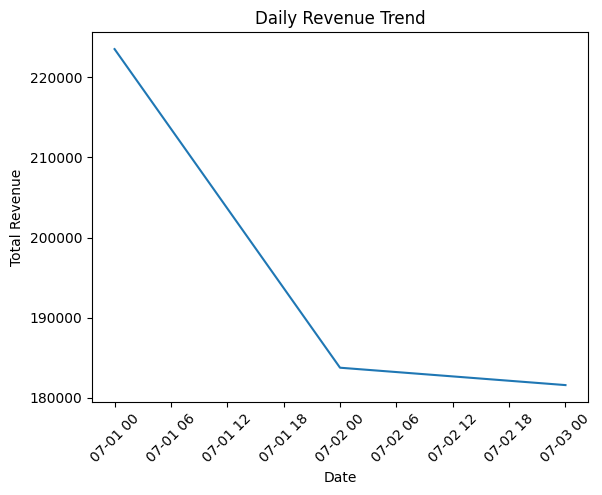

In [98]:
# If we want to see this in a graph
plt.figure()
plt.plot(daily_sales['date'], daily_sales['total_revenue'])
plt.title("Daily Revenue Trend")
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

Remember our confidence for the 3rd day is low so lets exclude it

In [108]:
fixed_sales = daily_sales[
    daily_sales['date'] != pd.to_datetime("2017-07-03")
].copy()

fixed_sales['day_index'] = np.arange(len(fixed_sales))

fixed_sales

,date,total_revenue,day_index
0,2017-07-01,223515.0,0
1,2017-07-02,183752.0,1


I use a 3-day moving average excluding July 3 to estimate short-term trend while minimizing noise, something like logistic regression would just see the downward trend and assume that would be the case for the 4th of July too

Since there are only two days we can also use a moving average

In [109]:
last_2_avg = fixed_sales['total_revenue'].tail(3).mean()

prediction_ma = last_2_avg
prediction_ma


np.float64(203633.5)

The moving average predicts a revenue of 203,633.50 dollars for the 4th, but you should always look at standard deviation

In [110]:
std_dev = fixed_sales['total_revenue'].tail(3).std()

lower_bound = prediction_ma - std_dev
upper_bound = prediction_ma + std_dev

prediction_ma, lower_bound, upper_bound

(np.float64(203633.5),
 np.float64(175516.81305967932),
 np.float64(231750.18694032068))

Our standard deviation for the prediction is ~28,000 dollars

## [Question 5] Final Forecast
## Predicted revenue for 2017-07-04 is $203,633.50 for the 4th of July
## Uncertainty: ±28,000 dollars based on standard deviation
## Method: Moving average (excluding July 3 anomaly) which is just the average of the 1st and 2nd of July, standard deviation was calculated after.
## Assumptions: No major marketing campaign change, No additional data logging failures, no holiday uptick. Because July 4 is a U.S. holiday, purchasing behavior may deviate from prior weekdays. Without historical holiday data, our forecast assumes no major holiday effect.

## [Question 6 start] Is there any additional information, data or access that would make your prediction better?


## [Question 6] My prediction would be better If there is information from previous years comparing the days right before the 4th of July that would be useful so we can calculate the holiday effect. Also, we can compare typical days of the week for whatever weekday the 4th falls on, e.g. if it is a Tuesday what do normal Tuesdays look like?
## Generally, too we would prefer to have traffic data because that would give us an idea of what the demand is like, so do lots of people visit the site and less buy or?
## Customer cohort data would also be interesting, there was one customer who made large purchases on both the 1st and the 2nd yet not on the 3rd, there was another customer that day who made a large purchase. Beyond the large spenders it is also important to know general who is targetable for advertising
## Lastly Marketing, inventory, and pricing data would be useful, is there advertising or marketing currently being employed, is there enough supply to meet the demands, and what are the actual prices instead of our inferred pricing